In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import matplotlib.pyplot as plt
import torchvision

from sklearn.metrics import confusion_matrix
from tqdm.auto import tqdm

from funcs import *
from models import *

In [7]:
# os.environ["CUDA_VISIBLE_DEVICES"] = '0, 1'
# device_ids = [0, 1]

In [3]:
data_root_dir = "/amax/home/junwei/deep-learning/CIFAR10"
transformer = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR10(root=data_root_dir, train=True, transform=transformer, download=True)
test_dataset = torchvision.datasets.CIFAR10(root=data_root_dir, train=False, transform=transformer, download=True)
generator = torch.Generator().manual_seed(1689)
trainset, validset = Data.random_split(train_dataset, [0.8, 0.2], generator)

Files already downloaded and verified
Files already downloaded and verified


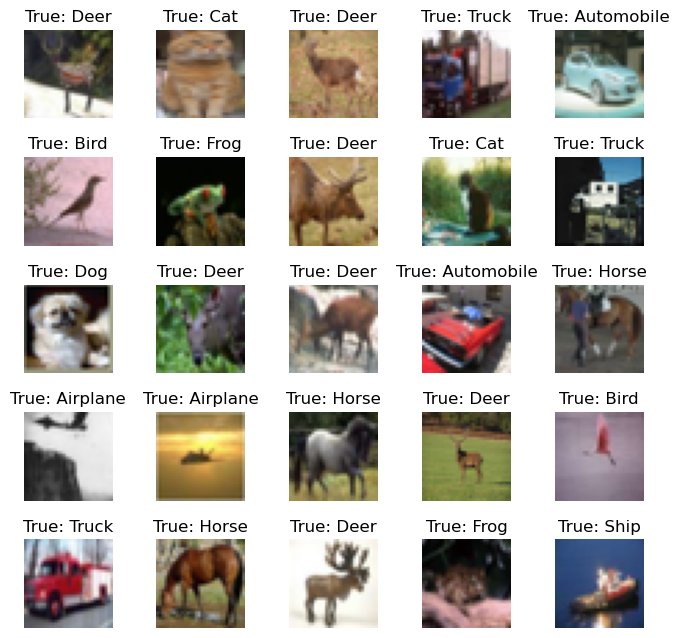

In [11]:
row = 5
column = 5
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes = plt.subplots(row, column, figsize=(8, 8))
axes = axes.ravel()

for i in range(row * column):
    img, label = trainset[i]
    axes[i].imshow(img.permute(1,2,0))
    axes[i].set_title("True: %s" %(labels[label]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)

# Default

In [12]:
train_losses3, train_accs3, valid_losses3, valid_accs3, lrs3 = train_valid(CNN(kernel_size=3), trainset, validset, lrd=1)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.5503], valid loss: [1.6202]
epoch [1], train accuracy: [0.2682], valid accuracy: [0.3968]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.4111], valid loss: [1.3119]
epoch [2], train accuracy: [0.4834], valid accuracy: [0.5387]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.1422], valid loss: [1.1931]
epoch [3], train accuracy: [0.5931], valid accuracy: [0.5701]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [0.9619], valid loss: [1.1740]
epoch [4], train accuracy: [0.6626], valid accuracy: [0.5934]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.8497], valid loss: [0.7657]
epoch [5], train accuracy: [0.7038], valid accuracy: [0.7346]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.7549], valid loss: [0.6915]
epoch [6], train accuracy: [0.7380], valid accuracy: [0.7603]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.6827], valid loss: [0.7121]
epoch [7], train accuracy: [0.7642], valid accuracy: [0.7587]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.6297], valid loss: [0.6913]
epoch [8], train accuracy: [0.7829], valid accuracy: [0.7660]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.5960], valid loss: [0.7156]
epoch [9], train accuracy: [0.7950], valid accuracy: [0.7563]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.5640], valid loss: [0.5886]
epoch [10], train accuracy: [0.8057], valid accuracy: [0.7994]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.5214], valid loss: [0.7466]
epoch [11], train accuracy: [0.8219], valid accuracy: [0.7579]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.5050], valid loss: [0.6161]
epoch [12], train accuracy: [0.8291], valid accuracy: [0.7905]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.4748], valid loss: [0.5869]
epoch [13], train accuracy: [0.8371], valid accuracy: [0.8051]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.4508], valid loss: [0.6403]
epoch [14], train accuracy: [0.8451], valid accuracy: [0.7922]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.4386], valid loss: [0.6337]
epoch [15], train accuracy: [0.8477], valid accuracy: [0.7945]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.4176], valid loss: [0.5837]
epoch [16], train accuracy: [0.8589], valid accuracy: [0.8053]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.4077], valid loss: [0.6932]
epoch [17], train accuracy: [0.8606], valid accuracy: [0.7804]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.3900], valid loss: [0.6791]
epoch [18], train accuracy: [0.8681], valid accuracy: [0.7845]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.3785], valid loss: [0.6410]
epoch [19], train accuracy: [0.8708], valid accuracy: [0.8106]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.3666], valid loss: [0.6262]
epoch [20], train accuracy: [0.8770], valid accuracy: [0.8066]


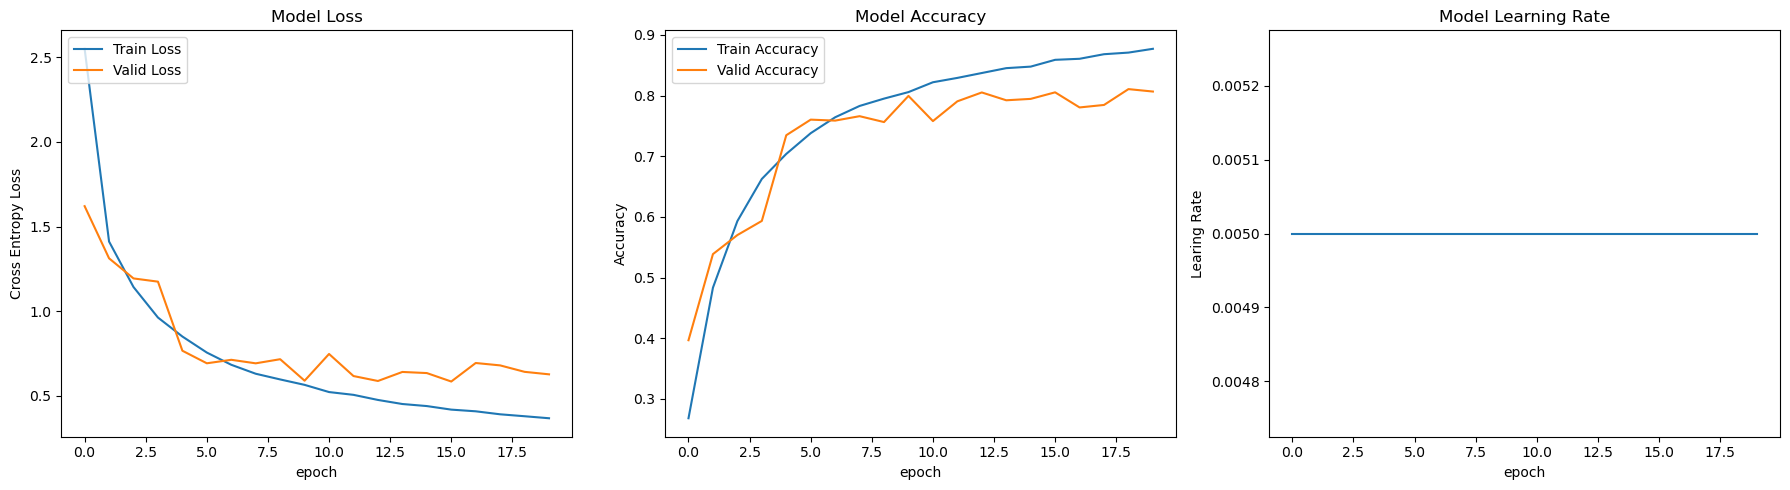

In [13]:
show_process(train_losses3, valid_losses3, train_accs3, valid_accs3, lrs3)

# Network Depth

In [30]:
train_losses2, train_accs2, valid_losses2, valid_accs2, lrs2 = train_valid(CNN2(kernel_size=3), trainset, validset, lrd=1)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [4.1845], valid loss: [1.5030]
epoch [1], train accuracy: [0.2958], valid accuracy: [0.4606]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.4309], valid loss: [1.3804]
epoch [2], train accuracy: [0.4816], valid accuracy: [0.5059]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.2184], valid loss: [1.2498]
epoch [3], train accuracy: [0.5652], valid accuracy: [0.5515]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [1.0909], valid loss: [1.1652]
epoch [4], train accuracy: [0.6162], valid accuracy: [0.6055]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.9918], valid loss: [0.8982]
epoch [5], train accuracy: [0.6543], valid accuracy: [0.6823]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.9367], valid loss: [0.8466]
epoch [6], train accuracy: [0.6757], valid accuracy: [0.6963]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.8844], valid loss: [0.8328]
epoch [7], train accuracy: [0.6943], valid accuracy: [0.7042]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.8559], valid loss: [0.8649]
epoch [8], train accuracy: [0.7029], valid accuracy: [0.7017]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.8293], valid loss: [0.7310]
epoch [9], train accuracy: [0.7134], valid accuracy: [0.7442]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.8073], valid loss: [0.7903]
epoch [10], train accuracy: [0.7245], valid accuracy: [0.7214]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.7633], valid loss: [0.7924]
epoch [11], train accuracy: [0.7388], valid accuracy: [0.7274]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.7572], valid loss: [0.7549]
epoch [12], train accuracy: [0.7406], valid accuracy: [0.7400]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.7594], valid loss: [0.7268]
epoch [13], train accuracy: [0.7378], valid accuracy: [0.7425]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.7230], valid loss: [0.7469]
epoch [14], train accuracy: [0.7524], valid accuracy: [0.7464]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.7274], valid loss: [0.6627]
epoch [15], train accuracy: [0.7522], valid accuracy: [0.7652]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.7174], valid loss: [0.7788]
epoch [16], train accuracy: [0.7530], valid accuracy: [0.7348]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.7130], valid loss: [0.6900]
epoch [17], train accuracy: [0.7568], valid accuracy: [0.7614]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.6937], valid loss: [0.7000]
epoch [18], train accuracy: [0.7633], valid accuracy: [0.7561]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.6820], valid loss: [0.7274]
epoch [19], train accuracy: [0.7672], valid accuracy: [0.7488]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.6792], valid loss: [0.6688]
epoch [20], train accuracy: [0.7653], valid accuracy: [0.7648]


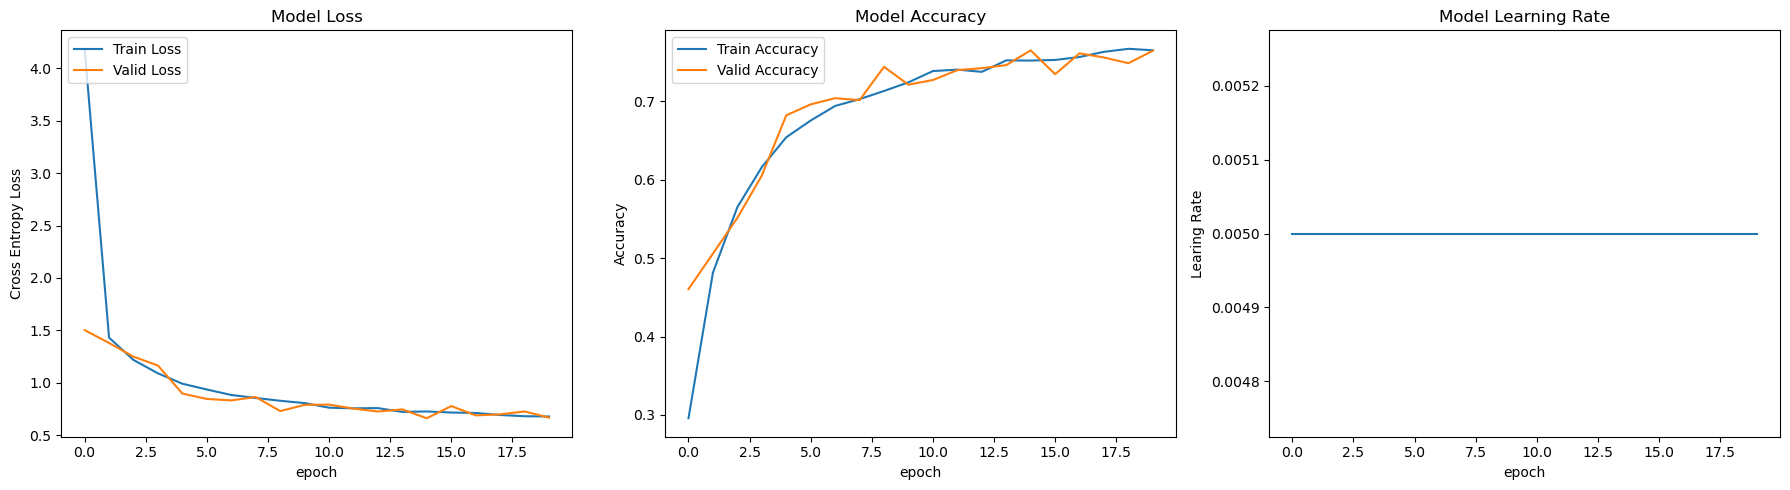

In [31]:
show_process(train_losses2, valid_losses2, train_accs2, valid_accs2, lrs2)

In [5]:
train_losses4, train_accs4, valid_losses4, valid_accs4, lrs4 = train_valid(CNN4(kernel_size=3), trainset, validset, lrd=1)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.1349], valid loss: [1.6502]
epoch [1], train accuracy: [0.2402], valid accuracy: [0.3856]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.4377], valid loss: [1.1937]
epoch [2], train accuracy: [0.4713], valid accuracy: [0.5675]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.1227], valid loss: [0.9394]
epoch [3], train accuracy: [0.5981], valid accuracy: [0.6614]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [0.9085], valid loss: [0.9626]
epoch [4], train accuracy: [0.6855], valid accuracy: [0.6852]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.7749], valid loss: [1.1236]
epoch [5], train accuracy: [0.7386], valid accuracy: [0.6680]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.6694], valid loss: [0.7015]
epoch [6], train accuracy: [0.7748], valid accuracy: [0.7626]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.6019], valid loss: [0.6788]
epoch [7], train accuracy: [0.7993], valid accuracy: [0.7725]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.5412], valid loss: [0.6632]
epoch [8], train accuracy: [0.8205], valid accuracy: [0.7778]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.4857], valid loss: [0.6694]
epoch [9], train accuracy: [0.8397], valid accuracy: [0.7851]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.4546], valid loss: [0.6416]
epoch [10], train accuracy: [0.8514], valid accuracy: [0.7921]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.4023], valid loss: [0.6316]
epoch [11], train accuracy: [0.8680], valid accuracy: [0.8060]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.3653], valid loss: [0.6126]
epoch [12], train accuracy: [0.8810], valid accuracy: [0.8085]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.3338], valid loss: [0.7009]
epoch [13], train accuracy: [0.8890], valid accuracy: [0.7899]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.3171], valid loss: [0.6826]
epoch [14], train accuracy: [0.8972], valid accuracy: [0.8068]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.2824], valid loss: [0.7200]
epoch [15], train accuracy: [0.9094], valid accuracy: [0.8032]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.2726], valid loss: [0.8242]
epoch [16], train accuracy: [0.9138], valid accuracy: [0.7614]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.2488], valid loss: [0.6741]
epoch [17], train accuracy: [0.9207], valid accuracy: [0.8152]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.2316], valid loss: [0.8129]
epoch [18], train accuracy: [0.9261], valid accuracy: [0.8087]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.2209], valid loss: [0.7272]
epoch [19], train accuracy: [0.9314], valid accuracy: [0.8145]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.2121], valid loss: [0.6753]
epoch [20], train accuracy: [0.9335], valid accuracy: [0.8186]


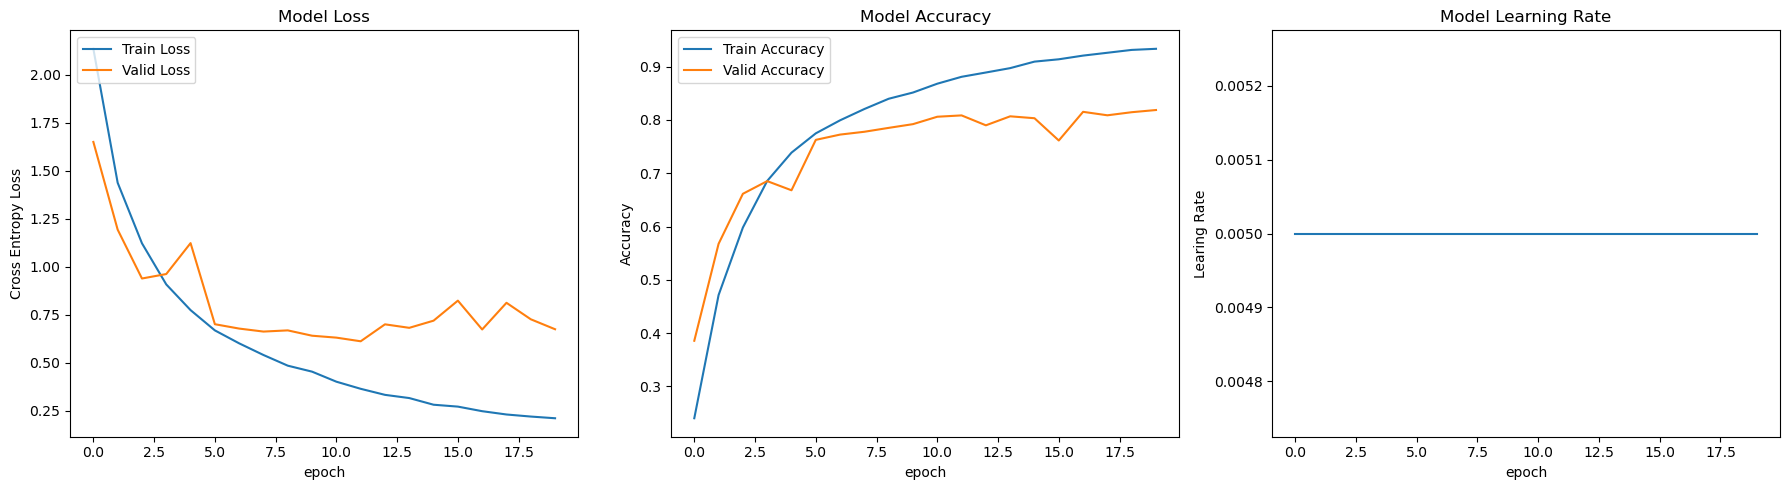

In [6]:
show_process(train_losses4, valid_losses4, train_accs4, valid_accs4, lrs4)

# Normalization

In [28]:
train_lossesN, train_accsN, valid_lossesN, valid_accsN, lrsN = train_valid(CNN_N(kernel_size=3), trainset, validset, lrd=1)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.1048], valid loss: [1.9955]
epoch [1], train accuracy: [0.2109], valid accuracy: [0.2529]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.9486], valid loss: [1.8297]
epoch [2], train accuracy: [0.2585], valid accuracy: [0.3002]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.8459], valid loss: [1.7071]
epoch [3], train accuracy: [0.2979], valid accuracy: [0.3560]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [1.7939], valid loss: [1.6721]
epoch [4], train accuracy: [0.3206], valid accuracy: [0.3709]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [1.7723], valid loss: [1.6277]
epoch [5], train accuracy: [0.3244], valid accuracy: [0.3772]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [1.7427], valid loss: [1.5916]
epoch [6], train accuracy: [0.3338], valid accuracy: [0.3976]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [1.7338], valid loss: [1.6092]
epoch [7], train accuracy: [0.3392], valid accuracy: [0.3927]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [1.7217], valid loss: [1.5750]
epoch [8], train accuracy: [0.3419], valid accuracy: [0.4129]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [1.7261], valid loss: [1.5841]
epoch [9], train accuracy: [0.3378], valid accuracy: [0.4162]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [1.7020], valid loss: [1.5570]
epoch [10], train accuracy: [0.3507], valid accuracy: [0.4165]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [1.7082], valid loss: [1.5878]
epoch [11], train accuracy: [0.3452], valid accuracy: [0.4015]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [1.7017], valid loss: [1.5546]
epoch [12], train accuracy: [0.3497], valid accuracy: [0.4118]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [1.6953], valid loss: [1.5473]
epoch [13], train accuracy: [0.3543], valid accuracy: [0.4295]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [1.7023], valid loss: [1.5644]
epoch [14], train accuracy: [0.3523], valid accuracy: [0.4011]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [1.6950], valid loss: [1.5490]
epoch [15], train accuracy: [0.3552], valid accuracy: [0.4143]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [1.6982], valid loss: [1.5866]
epoch [16], train accuracy: [0.3522], valid accuracy: [0.4058]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [1.6913], valid loss: [1.5700]
epoch [17], train accuracy: [0.3605], valid accuracy: [0.4028]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [1.6866], valid loss: [1.5852]
epoch [18], train accuracy: [0.3608], valid accuracy: [0.3957]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [1.6699], valid loss: [1.5478]
epoch [19], train accuracy: [0.3679], valid accuracy: [0.4178]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [1.6570], valid loss: [1.5923]
epoch [20], train accuracy: [0.3708], valid accuracy: [0.4169]


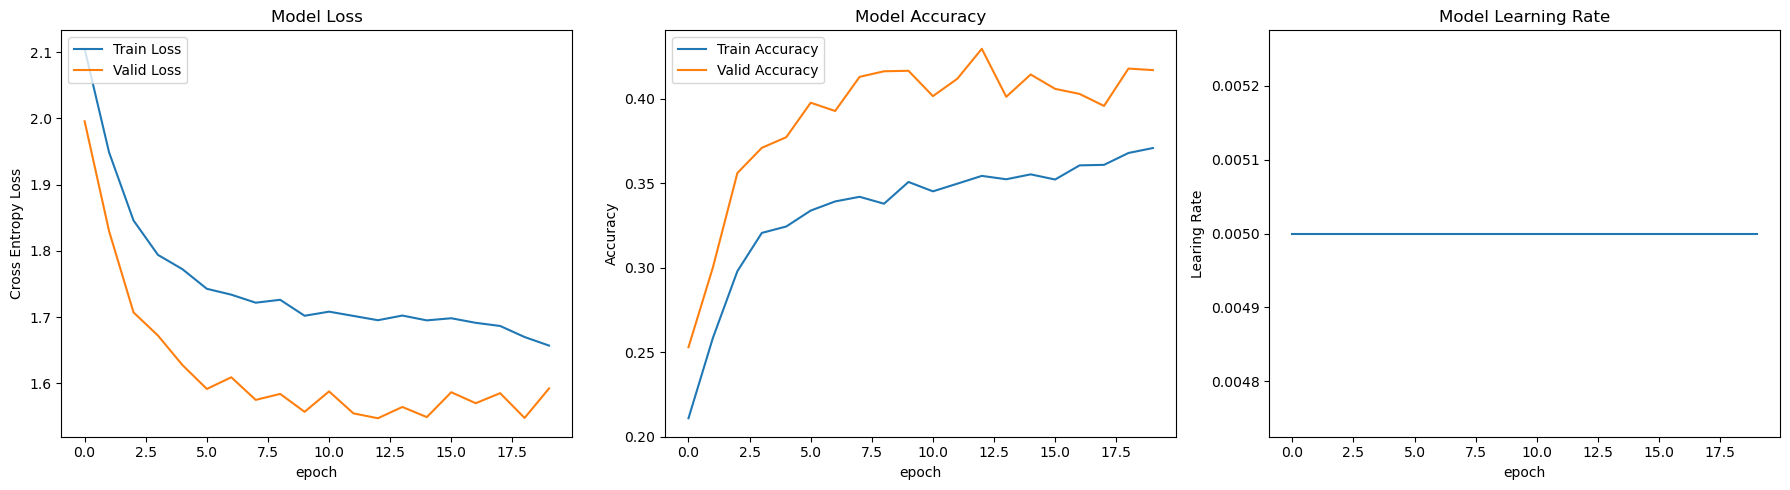

In [29]:
show_process(train_lossesN, valid_lossesN, train_accsN, valid_accsN, lrsN)

# Dropout

In [23]:
train_lossesD, train_accsD, valid_lossesD, valid_accsD, lrsD = train_valid(CNN(kernel_size=3, dropout_rate=0), trainset, validset, lrd=1)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.5935], valid loss: [1.6491]
epoch [1], train accuracy: [0.3105], valid accuracy: [0.3959]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.3791], valid loss: [1.6513]
epoch [2], train accuracy: [0.4975], valid accuracy: [0.4491]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.0707], valid loss: [1.0062]
epoch [3], train accuracy: [0.6163], valid accuracy: [0.6386]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [0.8748], valid loss: [1.0190]
epoch [4], train accuracy: [0.6919], valid accuracy: [0.6384]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.7352], valid loss: [0.8727]
epoch [5], train accuracy: [0.7422], valid accuracy: [0.6971]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.6294], valid loss: [0.6844]
epoch [6], train accuracy: [0.7827], valid accuracy: [0.7633]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.5456], valid loss: [0.7059]
epoch [7], train accuracy: [0.8108], valid accuracy: [0.7540]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.4807], valid loss: [0.7114]
epoch [8], train accuracy: [0.8315], valid accuracy: [0.7673]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.4212], valid loss: [0.6849]
epoch [9], train accuracy: [0.8535], valid accuracy: [0.7793]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.3763], valid loss: [0.7228]
epoch [10], train accuracy: [0.8680], valid accuracy: [0.7755]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.3233], valid loss: [0.6795]
epoch [11], train accuracy: [0.8868], valid accuracy: [0.7865]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.2829], valid loss: [0.6760]
epoch [12], train accuracy: [0.9003], valid accuracy: [0.7945]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.2452], valid loss: [0.7086]
epoch [13], train accuracy: [0.9117], valid accuracy: [0.7995]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.2321], valid loss: [0.7883]
epoch [14], train accuracy: [0.9171], valid accuracy: [0.7991]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.2045], valid loss: [0.8267]
epoch [15], train accuracy: [0.9295], valid accuracy: [0.7801]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.1867], valid loss: [0.7698]
epoch [16], train accuracy: [0.9347], valid accuracy: [0.7991]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.1502], valid loss: [0.9176]
epoch [17], train accuracy: [0.9482], valid accuracy: [0.7963]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.1624], valid loss: [0.9437]
epoch [18], train accuracy: [0.9433], valid accuracy: [0.7788]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.1501], valid loss: [0.9510]
epoch [19], train accuracy: [0.9489], valid accuracy: [0.7746]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.1383], valid loss: [1.1060]
epoch [20], train accuracy: [0.9527], valid accuracy: [0.7574]


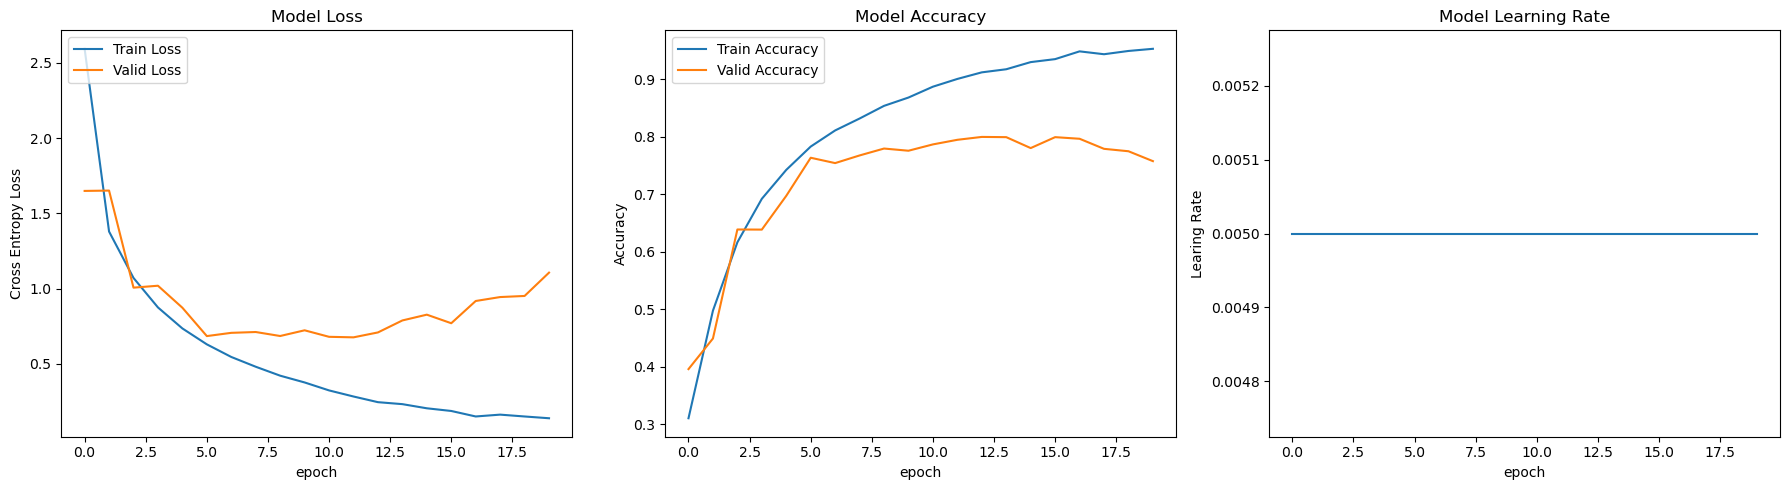

In [24]:
show_process(train_lossesD, valid_lossesD, train_accsD, valid_accsD, lrsD)

In [26]:
train_lossesD25, train_accsD25, valid_lossesD25, valid_accsD25, lrsD25 = train_valid(CNN(kernel_size=3, dropout_rate=0.25), trainset, validset, lrd=1)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.3168], valid loss: [1.6150]
epoch [1], train accuracy: [0.3087], valid accuracy: [0.4048]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.4213], valid loss: [1.4631]
epoch [2], train accuracy: [0.4784], valid accuracy: [0.4606]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.1464], valid loss: [1.1834]
epoch [3], train accuracy: [0.5896], valid accuracy: [0.5778]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [0.9809], valid loss: [0.9959]
epoch [4], train accuracy: [0.6535], valid accuracy: [0.6449]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.8416], valid loss: [0.8646]
epoch [5], train accuracy: [0.7044], valid accuracy: [0.6971]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.7397], valid loss: [0.7396]
epoch [6], train accuracy: [0.7427], valid accuracy: [0.7360]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.6610], valid loss: [0.8038]
epoch [7], train accuracy: [0.7698], valid accuracy: [0.7236]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.5984], valid loss: [0.6254]
epoch [8], train accuracy: [0.7921], valid accuracy: [0.7804]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.5569], valid loss: [0.6608]
epoch [9], train accuracy: [0.8084], valid accuracy: [0.7768]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.5203], valid loss: [0.7433]
epoch [10], train accuracy: [0.8206], valid accuracy: [0.7542]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.4788], valid loss: [0.7727]
epoch [11], train accuracy: [0.8330], valid accuracy: [0.7402]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.4375], valid loss: [0.6987]
epoch [12], train accuracy: [0.8486], valid accuracy: [0.7762]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.4131], valid loss: [0.6672]
epoch [13], train accuracy: [0.8561], valid accuracy: [0.7872]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.3977], valid loss: [0.6550]
epoch [14], train accuracy: [0.8619], valid accuracy: [0.7921]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.3697], valid loss: [0.6189]
epoch [15], train accuracy: [0.8713], valid accuracy: [0.8026]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.3395], valid loss: [0.7382]
epoch [16], train accuracy: [0.8797], valid accuracy: [0.7661]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.3184], valid loss: [0.6579]
epoch [17], train accuracy: [0.8896], valid accuracy: [0.7890]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.3022], valid loss: [0.6381]
epoch [18], train accuracy: [0.8943], valid accuracy: [0.8076]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.3002], valid loss: [0.7618]
epoch [19], train accuracy: [0.8947], valid accuracy: [0.7847]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.2773], valid loss: [0.6955]
epoch [20], train accuracy: [0.9027], valid accuracy: [0.7995]


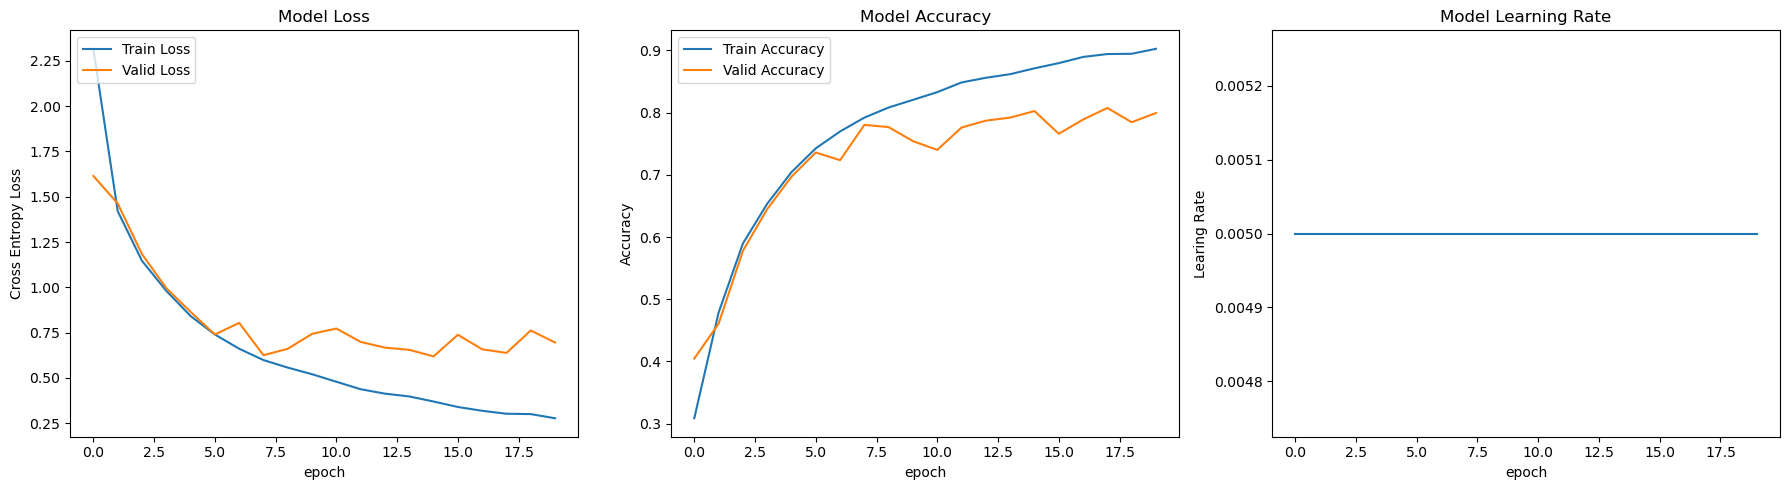

In [27]:
show_process(train_lossesD25, valid_lossesD25, train_accsD25, valid_accsD25, lrsD25)

In [39]:
train_lossesD75, train_accsD75, valid_lossesD75, valid_accsD75, lrsD75 = train_valid(CNN(kernel_size=3, dropout_rate=0.75), trainset, validset, lrd=1)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.3257], valid loss: [1.9390]
epoch [1], train accuracy: [0.2731], valid accuracy: [0.3271]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.5257], valid loss: [1.4014]
epoch [2], train accuracy: [0.4392], valid accuracy: [0.4926]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.2912], valid loss: [1.2421]
epoch [3], train accuracy: [0.5376], valid accuracy: [0.5532]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [1.1718], valid loss: [0.9445]
epoch [4], train accuracy: [0.5886], valid accuracy: [0.6664]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [1.0736], valid loss: [1.1236]
epoch [5], train accuracy: [0.6238], valid accuracy: [0.6097]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.9941], valid loss: [0.9474]
epoch [6], train accuracy: [0.6544], valid accuracy: [0.6553]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.9336], valid loss: [0.9240]
epoch [7], train accuracy: [0.6757], valid accuracy: [0.6822]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.8785], valid loss: [1.0211]
epoch [8], train accuracy: [0.7009], valid accuracy: [0.6297]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.8425], valid loss: [0.7241]
epoch [9], train accuracy: [0.7130], valid accuracy: [0.7469]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.7961], valid loss: [0.8178]
epoch [10], train accuracy: [0.7298], valid accuracy: [0.7177]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.7699], valid loss: [0.7907]
epoch [11], train accuracy: [0.7425], valid accuracy: [0.7219]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.7392], valid loss: [0.8127]
epoch [12], train accuracy: [0.7538], valid accuracy: [0.7279]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.7014], valid loss: [0.6505]
epoch [13], train accuracy: [0.7684], valid accuracy: [0.7818]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.6697], valid loss: [0.6476]
epoch [14], train accuracy: [0.7729], valid accuracy: [0.7838]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.6501], valid loss: [0.7414]
epoch [15], train accuracy: [0.7864], valid accuracy: [0.7589]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.6474], valid loss: [0.6664]
epoch [16], train accuracy: [0.7862], valid accuracy: [0.7844]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.6164], valid loss: [0.6263]
epoch [17], train accuracy: [0.7992], valid accuracy: [0.7926]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.6098], valid loss: [0.7170]
epoch [18], train accuracy: [0.8005], valid accuracy: [0.7690]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.5761], valid loss: [0.7145]
epoch [19], train accuracy: [0.8108], valid accuracy: [0.7731]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.5603], valid loss: [0.6372]
epoch [20], train accuracy: [0.8181], valid accuracy: [0.7922]


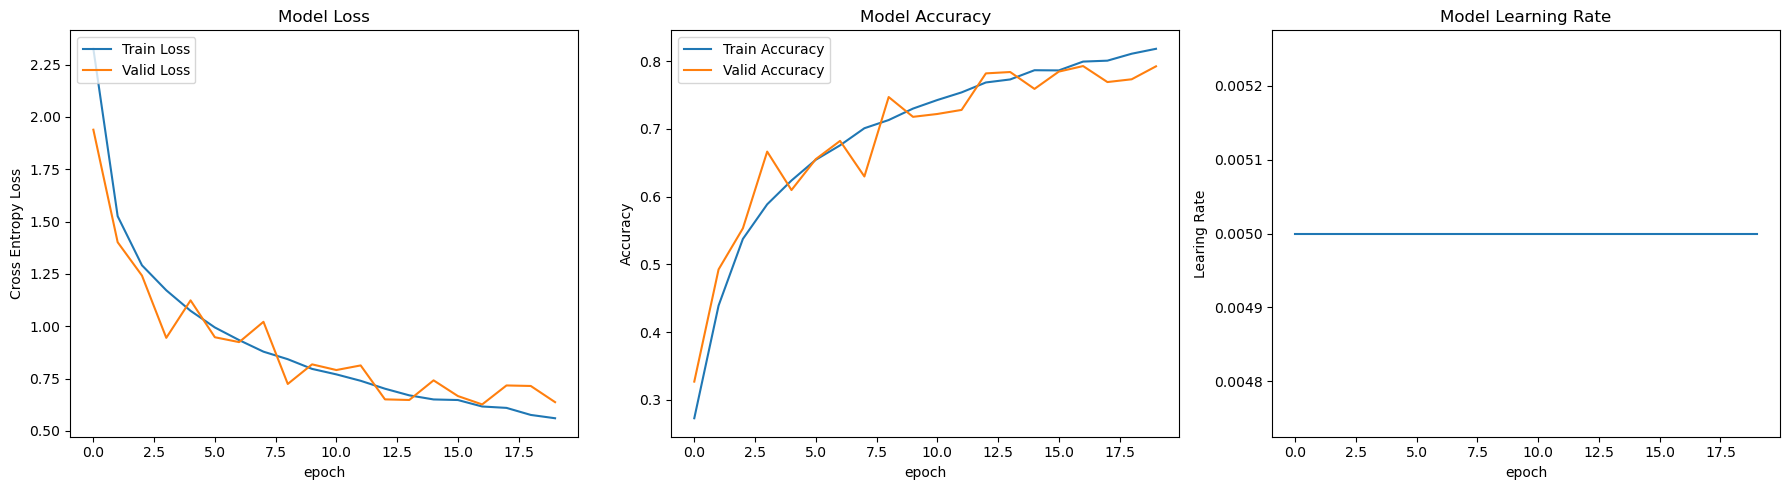

In [40]:
show_process(train_lossesD75, valid_lossesD75, train_accsD75, valid_accsD75, lrsD75)

# Learning Rate Decay

In [16]:
train_losses95, train_accs95, valid_losses95, valid_accs95, lrs95 = train_valid(CNN(kernel_size=3), trainset, validset, lrd=0.95)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.3739], valid loss: [1.5214]
epoch [1], train accuracy: [0.3173], valid accuracy: [0.4460]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.3555], valid loss: [1.2228]
epoch [2], train accuracy: [0.5048], valid accuracy: [0.5531]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.1082], valid loss: [1.2121]
epoch [3], train accuracy: [0.6079], valid accuracy: [0.5700]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [0.9524], valid loss: [0.8338]
epoch [4], train accuracy: [0.6643], valid accuracy: [0.6992]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.8423], valid loss: [0.9014]
epoch [5], train accuracy: [0.7068], valid accuracy: [0.6901]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.7586], valid loss: [0.8203]
epoch [6], train accuracy: [0.7387], valid accuracy: [0.7183]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.6878], valid loss: [0.6880]
epoch [7], train accuracy: [0.7630], valid accuracy: [0.7520]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.6329], valid loss: [0.6249]
epoch [8], train accuracy: [0.7844], valid accuracy: [0.7809]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.5780], valid loss: [0.8767]
epoch [9], train accuracy: [0.8016], valid accuracy: [0.7117]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.5435], valid loss: [0.7315]
epoch [10], train accuracy: [0.8129], valid accuracy: [0.7525]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.5080], valid loss: [0.6407]
epoch [11], train accuracy: [0.8248], valid accuracy: [0.7873]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.4617], valid loss: [0.5924]
epoch [12], train accuracy: [0.8415], valid accuracy: [0.7935]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.4309], valid loss: [0.6399]
epoch [13], train accuracy: [0.8500], valid accuracy: [0.7935]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.3971], valid loss: [0.6068]
epoch [14], train accuracy: [0.8634], valid accuracy: [0.7969]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.3779], valid loss: [0.5536]
epoch [15], train accuracy: [0.8692], valid accuracy: [0.8178]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.3395], valid loss: [0.6147]
epoch [16], train accuracy: [0.8828], valid accuracy: [0.8048]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.3136], valid loss: [0.5429]
epoch [17], train accuracy: [0.8897], valid accuracy: [0.8301]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.2876], valid loss: [0.5620]
epoch [18], train accuracy: [0.8992], valid accuracy: [0.8289]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.2658], valid loss: [0.6870]
epoch [19], train accuracy: [0.9083], valid accuracy: [0.8040]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.2466], valid loss: [0.5922]
epoch [20], train accuracy: [0.9137], valid accuracy: [0.8211]


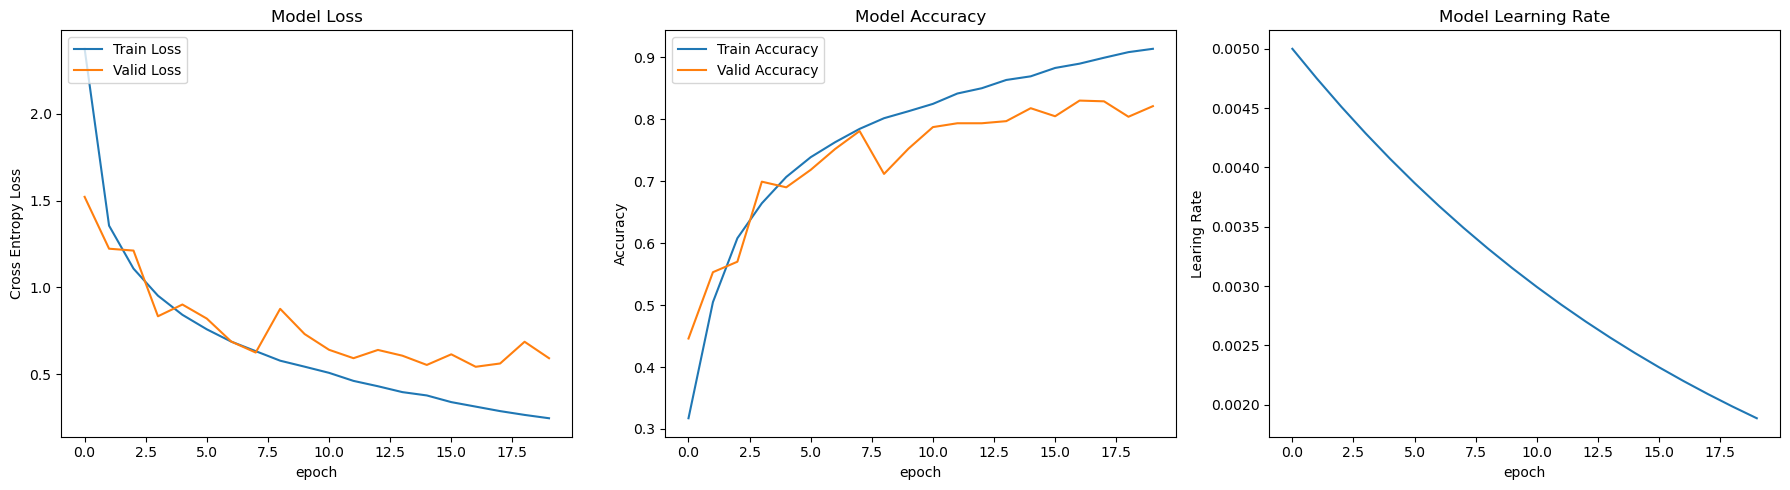

In [17]:
show_process(train_losses95, valid_losses95, train_accs95, valid_accs95, lrs95)

In [7]:
train_losses90, train_accs90, valid_losses90, valid_accs90, lrs90 = train_valid(CNN(kernel_size=3), trainset, validset, lrd=0.90)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.3517], valid loss: [1.6579]
epoch [1], train accuracy: [0.3139], valid accuracy: [0.4097]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.3725], valid loss: [1.2522]
epoch [2], train accuracy: [0.5020], valid accuracy: [0.5438]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.0950], valid loss: [0.8939]
epoch [3], train accuracy: [0.6089], valid accuracy: [0.6870]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [0.9059], valid loss: [0.8174]
epoch [4], train accuracy: [0.6834], valid accuracy: [0.7149]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.7837], valid loss: [0.7592]
epoch [5], train accuracy: [0.7258], valid accuracy: [0.7341]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.7054], valid loss: [0.7656]
epoch [6], train accuracy: [0.7544], valid accuracy: [0.7316]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.6397], valid loss: [0.7416]
epoch [7], train accuracy: [0.7778], valid accuracy: [0.7442]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.5660], valid loss: [0.6235]
epoch [8], train accuracy: [0.8041], valid accuracy: [0.7846]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.5185], valid loss: [0.5980]
epoch [9], train accuracy: [0.8197], valid accuracy: [0.7950]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.4655], valid loss: [0.5513]
epoch [10], train accuracy: [0.8387], valid accuracy: [0.8069]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.4263], valid loss: [0.5581]
epoch [11], train accuracy: [0.8505], valid accuracy: [0.8076]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.3852], valid loss: [0.5353]
epoch [12], train accuracy: [0.8645], valid accuracy: [0.8207]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.3412], valid loss: [0.6021]
epoch [13], train accuracy: [0.8812], valid accuracy: [0.8034]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.3070], valid loss: [0.5763]
epoch [14], train accuracy: [0.8919], valid accuracy: [0.8141]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.2765], valid loss: [0.5755]
epoch [15], train accuracy: [0.9016], valid accuracy: [0.8185]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.2472], valid loss: [0.5557]
epoch [16], train accuracy: [0.9133], valid accuracy: [0.8257]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.2157], valid loss: [0.5415]
epoch [17], train accuracy: [0.9233], valid accuracy: [0.8327]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.1894], valid loss: [0.5586]
epoch [18], train accuracy: [0.9317], valid accuracy: [0.8324]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.1655], valid loss: [0.5907]
epoch [19], train accuracy: [0.9416], valid accuracy: [0.8330]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.1478], valid loss: [0.6070]
epoch [20], train accuracy: [0.9477], valid accuracy: [0.8344]


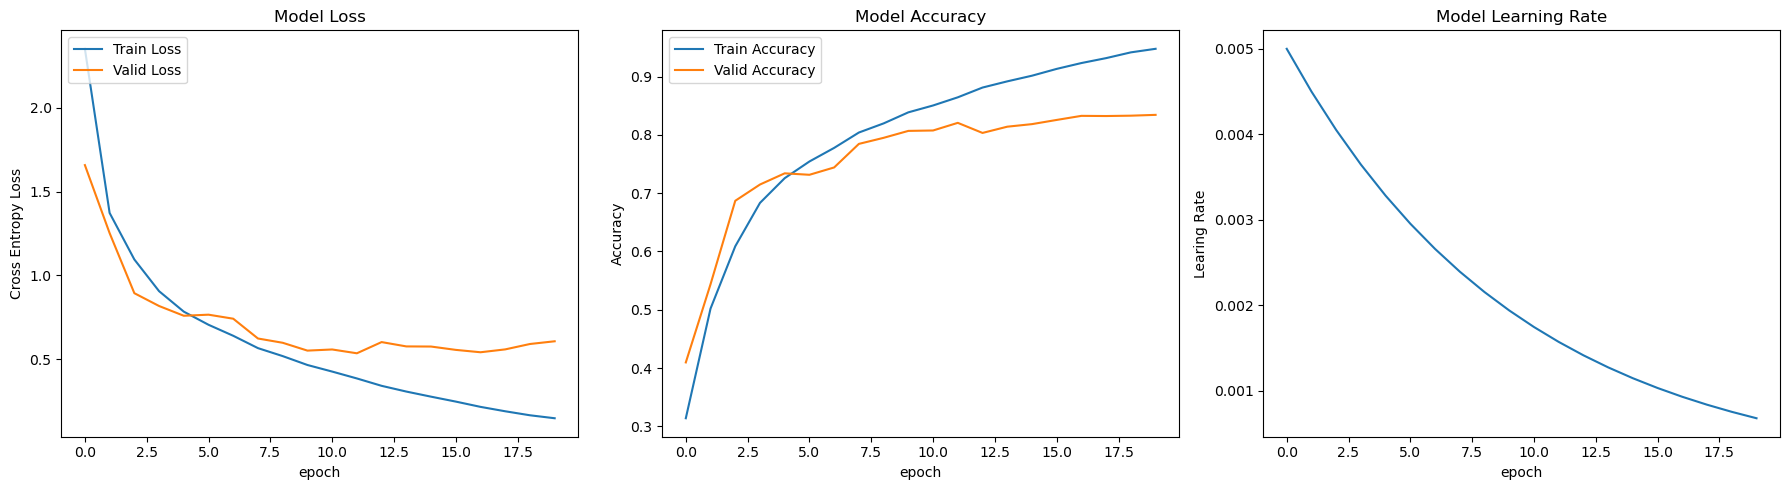

In [8]:
show_process(train_losses90, valid_losses90, train_accs90, valid_accs90, lrs90)

In [20]:
train_losses80, train_accs80, valid_losses80, valid_accs80, lrs80 = train_valid(CNN(kernel_size=3), trainset, validset, lrd=0.80)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.2087], valid loss: [1.5080]
epoch [1], train accuracy: [0.3080], valid accuracy: [0.4321]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.3791], valid loss: [1.2973]
epoch [2], train accuracy: [0.4968], valid accuracy: [0.5252]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.1086], valid loss: [1.1629]
epoch [3], train accuracy: [0.6027], valid accuracy: [0.6036]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [0.9325], valid loss: [0.8720]
epoch [4], train accuracy: [0.6668], valid accuracy: [0.6865]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.8096], valid loss: [0.8045]
epoch [5], train accuracy: [0.7123], valid accuracy: [0.7131]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.7116], valid loss: [0.7450]
epoch [6], train accuracy: [0.7479], valid accuracy: [0.7310]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.6362], valid loss: [0.6415]
epoch [7], train accuracy: [0.7786], valid accuracy: [0.7716]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.5720], valid loss: [0.5962]
epoch [8], train accuracy: [0.8007], valid accuracy: [0.7905]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.5116], valid loss: [0.5844]
epoch [9], train accuracy: [0.8207], valid accuracy: [0.7958]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.4609], valid loss: [0.5472]
epoch [10], train accuracy: [0.8393], valid accuracy: [0.8081]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.4199], valid loss: [0.5850]
epoch [11], train accuracy: [0.8536], valid accuracy: [0.7960]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.3830], valid loss: [0.5455]
epoch [12], train accuracy: [0.8654], valid accuracy: [0.8142]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.3488], valid loss: [0.5447]
epoch [13], train accuracy: [0.8794], valid accuracy: [0.8187]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.3217], valid loss: [0.5419]
epoch [14], train accuracy: [0.8874], valid accuracy: [0.8197]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.2977], valid loss: [0.5583]
epoch [15], train accuracy: [0.8954], valid accuracy: [0.8195]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.2810], valid loss: [0.5369]
epoch [16], train accuracy: [0.8998], valid accuracy: [0.8239]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.2686], valid loss: [0.5545]
epoch [17], train accuracy: [0.9059], valid accuracy: [0.8262]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.2554], valid loss: [0.5438]
epoch [18], train accuracy: [0.9095], valid accuracy: [0.8266]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.2447], valid loss: [0.5476]
epoch [19], train accuracy: [0.9126], valid accuracy: [0.8270]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.2353], valid loss: [0.5551]
epoch [20], train accuracy: [0.9164], valid accuracy: [0.8247]


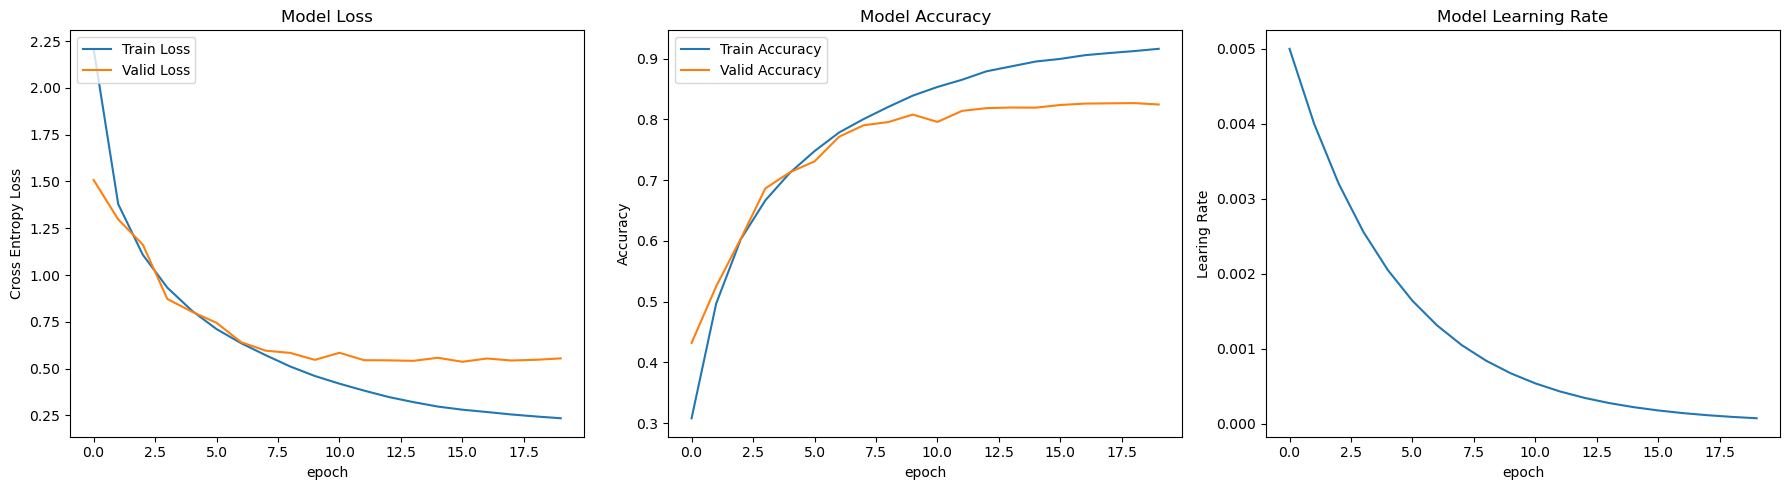

In [22]:
show_process(train_losses80, valid_losses80, train_accs80, valid_accs80, lrs80)

# Kernel Size

In [35]:
train_lossesK5, train_accsK5, valid_lossesK5, valid_accsK5, lrsK5 = train_valid(CNN(kernel_size=5), trainset, validset, lrd=1)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.3867], valid loss: [1.9417]
epoch [1], train accuracy: [0.2447], valid accuracy: [0.2860]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.5824], valid loss: [1.6519]
epoch [2], train accuracy: [0.4137], valid accuracy: [0.4206]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.3258], valid loss: [1.6019]
epoch [3], train accuracy: [0.5208], valid accuracy: [0.4567]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [1.0888], valid loss: [0.9236]
epoch [4], train accuracy: [0.6189], valid accuracy: [0.6749]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.9388], valid loss: [0.9705]
epoch [5], train accuracy: [0.6751], valid accuracy: [0.6651]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.8319], valid loss: [0.8807]
epoch [6], train accuracy: [0.7155], valid accuracy: [0.6922]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.7489], valid loss: [0.7711]
epoch [7], train accuracy: [0.7448], valid accuracy: [0.7316]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.6893], valid loss: [0.7904]
epoch [8], train accuracy: [0.7671], valid accuracy: [0.7291]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.6316], valid loss: [0.7926]
epoch [9], train accuracy: [0.7859], valid accuracy: [0.7221]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.5854], valid loss: [0.6641]
epoch [10], train accuracy: [0.8018], valid accuracy: [0.7792]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.5520], valid loss: [0.6265]
epoch [11], train accuracy: [0.8129], valid accuracy: [0.7863]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.5159], valid loss: [0.6861]
epoch [12], train accuracy: [0.8257], valid accuracy: [0.7750]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.4853], valid loss: [0.6379]
epoch [13], train accuracy: [0.8374], valid accuracy: [0.7885]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.4587], valid loss: [0.6927]
epoch [14], train accuracy: [0.8471], valid accuracy: [0.7818]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.4418], valid loss: [0.7487]
epoch [15], train accuracy: [0.8540], valid accuracy: [0.7802]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.4125], valid loss: [0.6401]
epoch [16], train accuracy: [0.8622], valid accuracy: [0.8027]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.3968], valid loss: [0.8480]
epoch [17], train accuracy: [0.8679], valid accuracy: [0.7654]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.3578], valid loss: [0.7220]
epoch [18], train accuracy: [0.8803], valid accuracy: [0.7853]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.3567], valid loss: [0.6695]
epoch [19], train accuracy: [0.8817], valid accuracy: [0.8015]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.3302], valid loss: [0.6899]
epoch [20], train accuracy: [0.8921], valid accuracy: [0.7964]


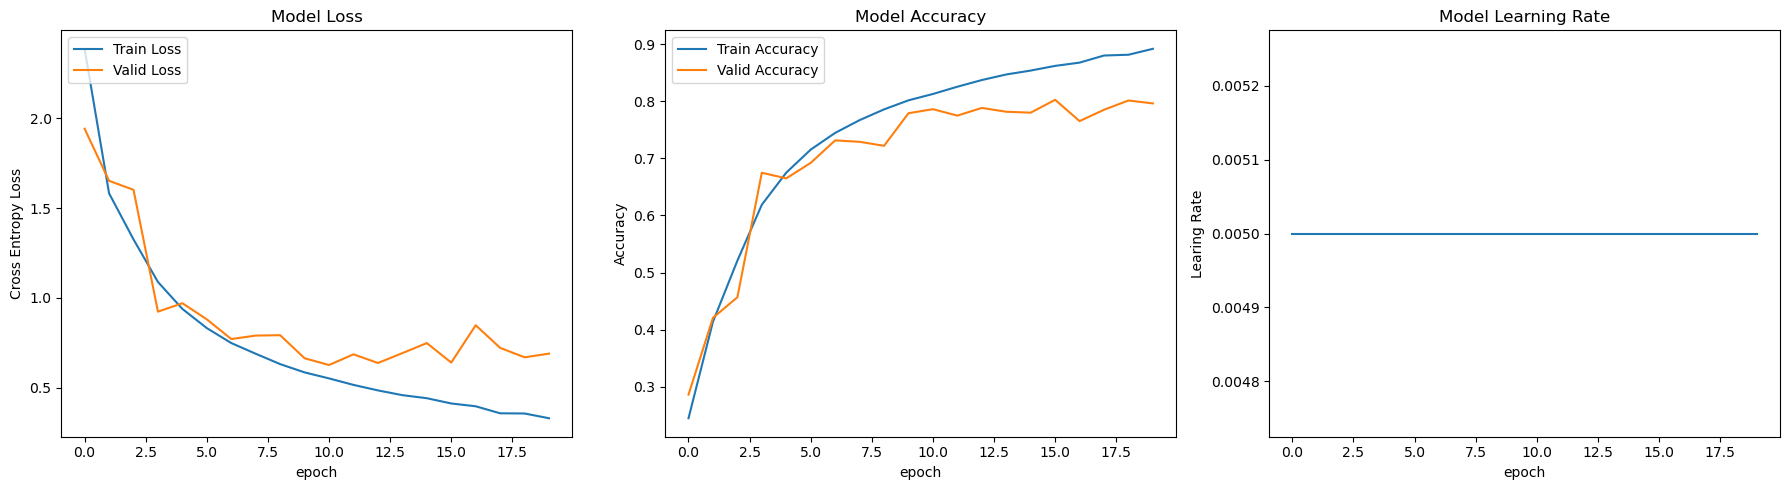

In [36]:
show_process(train_lossesK5, valid_lossesK5, train_accsK5, valid_accsK5, lrsK5)

In [37]:
train_lossesK7, train_accsK7, valid_lossesK7, valid_accsK7, lrsK7 = train_valid(CNN(kernel_size=7), trainset, validset, lrd=1)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.4534], valid loss: [2.4578]
epoch [1], train accuracy: [0.2063], valid accuracy: [0.2123]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.7127], valid loss: [1.5369]
epoch [2], train accuracy: [0.3592], valid accuracy: [0.4207]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.5022], valid loss: [1.4184]
epoch [3], train accuracy: [0.4510], valid accuracy: [0.4844]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [1.3116], valid loss: [1.1589]
epoch [4], train accuracy: [0.5310], valid accuracy: [0.5781]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [1.1402], valid loss: [1.2026]
epoch [5], train accuracy: [0.5994], valid accuracy: [0.6014]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.9942], valid loss: [0.9510]
epoch [6], train accuracy: [0.6590], valid accuracy: [0.6655]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.9044], valid loss: [1.0623]
epoch [7], train accuracy: [0.6929], valid accuracy: [0.6677]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.8172], valid loss: [0.7669]
epoch [8], train accuracy: [0.7247], valid accuracy: [0.7344]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.7433], valid loss: [0.8261]
epoch [9], train accuracy: [0.7492], valid accuracy: [0.7165]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.6789], valid loss: [0.9916]
epoch [10], train accuracy: [0.7719], valid accuracy: [0.6659]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.6261], valid loss: [0.7935]
epoch [11], train accuracy: [0.7908], valid accuracy: [0.7408]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.5826], valid loss: [0.8754]
epoch [12], train accuracy: [0.8044], valid accuracy: [0.7167]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.5392], valid loss: [1.1206]
epoch [13], train accuracy: [0.8192], valid accuracy: [0.6724]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.5081], valid loss: [0.7688]
epoch [14], train accuracy: [0.8335], valid accuracy: [0.7593]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.4680], valid loss: [0.7587]
epoch [15], train accuracy: [0.8460], valid accuracy: [0.7702]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.4530], valid loss: [0.7957]
epoch [16], train accuracy: [0.8512], valid accuracy: [0.7709]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.4223], valid loss: [0.7566]
epoch [17], train accuracy: [0.8636], valid accuracy: [0.7720]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.3966], valid loss: [0.8385]
epoch [18], train accuracy: [0.8707], valid accuracy: [0.7470]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.3601], valid loss: [0.7984]
epoch [19], train accuracy: [0.8813], valid accuracy: [0.7684]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.3431], valid loss: [0.7493]
epoch [20], train accuracy: [0.8868], valid accuracy: [0.7879]


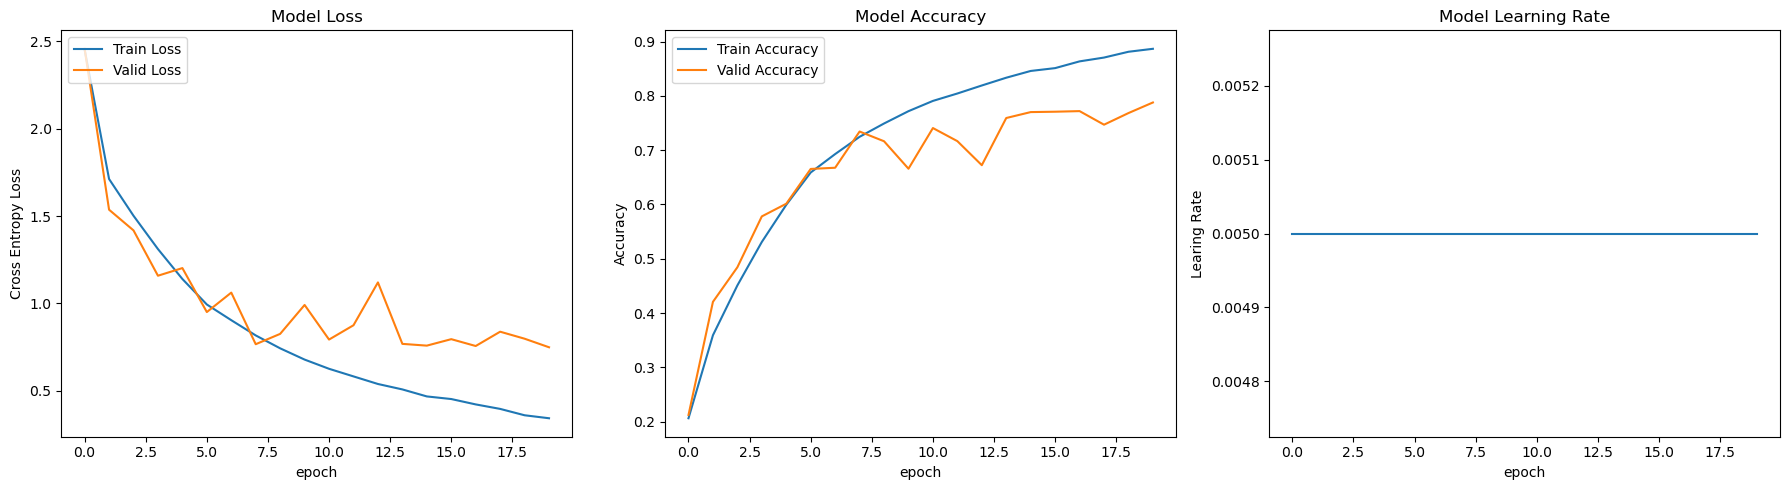

In [38]:
show_process(train_lossesK7, valid_lossesK7, train_accsK7, valid_accsK7, lrsK7)

# ResNet

In [9]:
train_lossesR, train_accsR, valid_lossesR, valid_accsR, lrsR = train_valid(ResNet(kernel_size=3), trainset, validset, lrd=0.90)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.3139], valid loss: [1.7369]
epoch [1], train accuracy: [0.2940], valid accuracy: [0.4067]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.4113], valid loss: [1.1606]
epoch [2], train accuracy: [0.5072], valid accuracy: [0.6056]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.0399], valid loss: [0.8942]
epoch [3], train accuracy: [0.6352], valid accuracy: [0.6858]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [0.8247], valid loss: [0.7790]
epoch [4], train accuracy: [0.7132], valid accuracy: [0.7352]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.6728], valid loss: [0.6765]
epoch [5], train accuracy: [0.7684], valid accuracy: [0.7650]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.5683], valid loss: [0.6395]
epoch [6], train accuracy: [0.8030], valid accuracy: [0.7795]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.4822], valid loss: [0.6889]
epoch [7], train accuracy: [0.8350], valid accuracy: [0.7711]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.4050], valid loss: [0.4928]
epoch [8], train accuracy: [0.8606], valid accuracy: [0.8311]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.3378], valid loss: [0.4970]
epoch [9], train accuracy: [0.8829], valid accuracy: [0.8356]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.2706], valid loss: [0.5174]
epoch [10], train accuracy: [0.9060], valid accuracy: [0.8299]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.2148], valid loss: [0.5117]
epoch [11], train accuracy: [0.9250], valid accuracy: [0.8433]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.1647], valid loss: [0.5458]
epoch [12], train accuracy: [0.9408], valid accuracy: [0.8402]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.1234], valid loss: [0.5693]
epoch [13], train accuracy: [0.9575], valid accuracy: [0.8458]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.0933], valid loss: [0.5338]
epoch [14], train accuracy: [0.9677], valid accuracy: [0.8608]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.0683], valid loss: [0.6003]
epoch [15], train accuracy: [0.9760], valid accuracy: [0.8547]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.0489], valid loss: [0.5713]
epoch [16], train accuracy: [0.9836], valid accuracy: [0.8636]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.0419], valid loss: [0.6475]
epoch [17], train accuracy: [0.9863], valid accuracy: [0.8575]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.0316], valid loss: [0.6110]
epoch [18], train accuracy: [0.9893], valid accuracy: [0.8645]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.0239], valid loss: [0.6331]
epoch [19], train accuracy: [0.9924], valid accuracy: [0.8687]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.0204], valid loss: [0.6773]
epoch [20], train accuracy: [0.9934], valid accuracy: [0.8677]


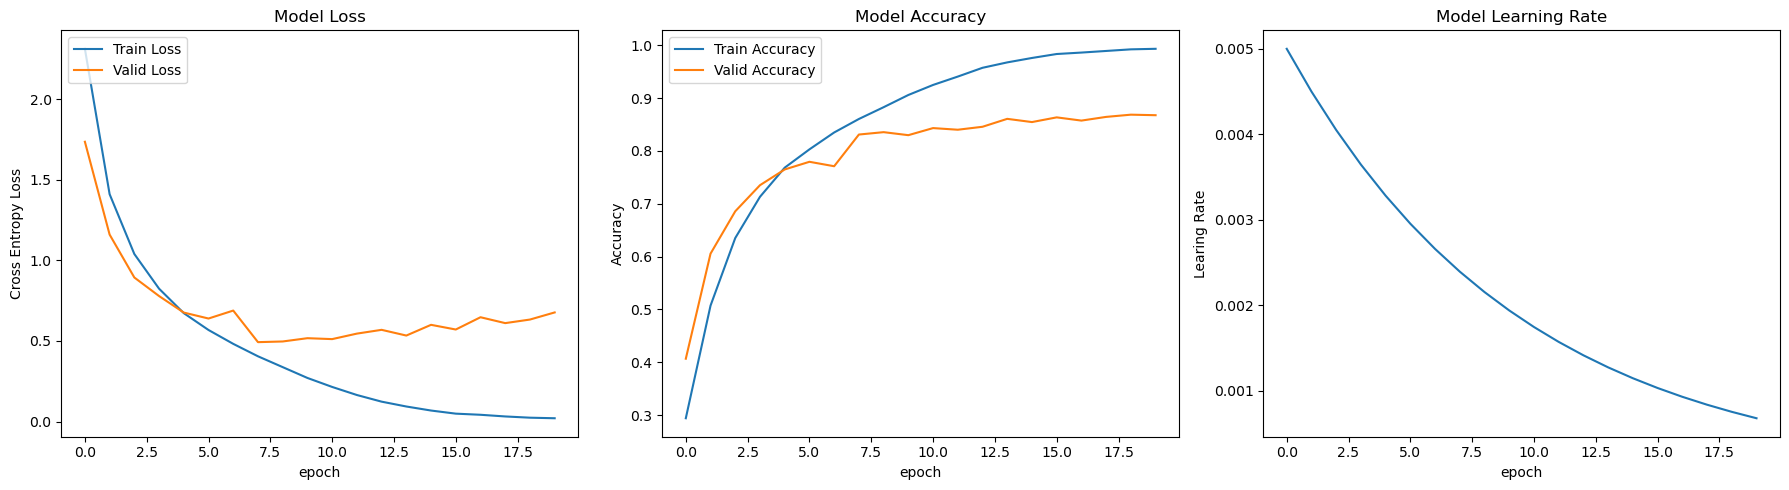

In [10]:
show_process(train_lossesR, valid_lossesR, train_accsR, valid_accsR, lrsR)

In [11]:
train_lossesR3, train_accsR3, valid_lossesR3, valid_accsR3, lrsR3 = train_valid(ResNet3(kernel_size=3), trainset, validset, lrd=0.9)

Running on cuda


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [1], train loss: [2.2777], valid loss: [1.9290]
epoch [1], train accuracy: [0.3072], valid accuracy: [0.4143]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [2], train loss: [1.4712], valid loss: [1.1491]
epoch [2], train accuracy: [0.5038], valid accuracy: [0.5877]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [3], train loss: [1.1385], valid loss: [1.2647]
epoch [3], train accuracy: [0.6126], valid accuracy: [0.5865]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [4], train loss: [0.9097], valid loss: [1.3229]
epoch [4], train accuracy: [0.6853], valid accuracy: [0.5908]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [5], train loss: [0.7784], valid loss: [0.7485]
epoch [5], train accuracy: [0.7295], valid accuracy: [0.7364]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [6], train loss: [0.6864], valid loss: [0.6458]
epoch [6], train accuracy: [0.7605], valid accuracy: [0.7779]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [7], train loss: [0.6083], valid loss: [0.6721]
epoch [7], train accuracy: [0.7909], valid accuracy: [0.7728]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [8], train loss: [0.5525], valid loss: [0.7100]
epoch [8], train accuracy: [0.8086], valid accuracy: [0.7568]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [9], train loss: [0.4999], valid loss: [0.5101]
epoch [9], train accuracy: [0.8260], valid accuracy: [0.8226]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [10], train loss: [0.4480], valid loss: [0.5481]
epoch [10], train accuracy: [0.8449], valid accuracy: [0.8097]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [11], train loss: [0.3899], valid loss: [0.4889]
epoch [11], train accuracy: [0.8651], valid accuracy: [0.8284]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [12], train loss: [0.3553], valid loss: [0.5128]
epoch [12], train accuracy: [0.8767], valid accuracy: [0.8216]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [13], train loss: [0.3056], valid loss: [0.5300]
epoch [13], train accuracy: [0.8930], valid accuracy: [0.8245]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [14], train loss: [0.2677], valid loss: [0.4572]
epoch [14], train accuracy: [0.9081], valid accuracy: [0.8505]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [15], train loss: [0.2315], valid loss: [0.4662]
epoch [15], train accuracy: [0.9193], valid accuracy: [0.8524]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [16], train loss: [0.1962], valid loss: [0.4618]
epoch [16], train accuracy: [0.9324], valid accuracy: [0.8504]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [17], train loss: [0.1689], valid loss: [0.4747]
epoch [17], train accuracy: [0.9423], valid accuracy: [0.8516]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [18], train loss: [0.1415], valid loss: [0.4721]
epoch [18], train accuracy: [0.9528], valid accuracy: [0.8540]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [19], train loss: [0.1230], valid loss: [0.4965]
epoch [19], train accuracy: [0.9587], valid accuracy: [0.8584]


  0%|          | 0/313 [00:00<?, ?it/s]

epoch [20], train loss: [0.1056], valid loss: [0.4997]
epoch [20], train accuracy: [0.9655], valid accuracy: [0.8558]


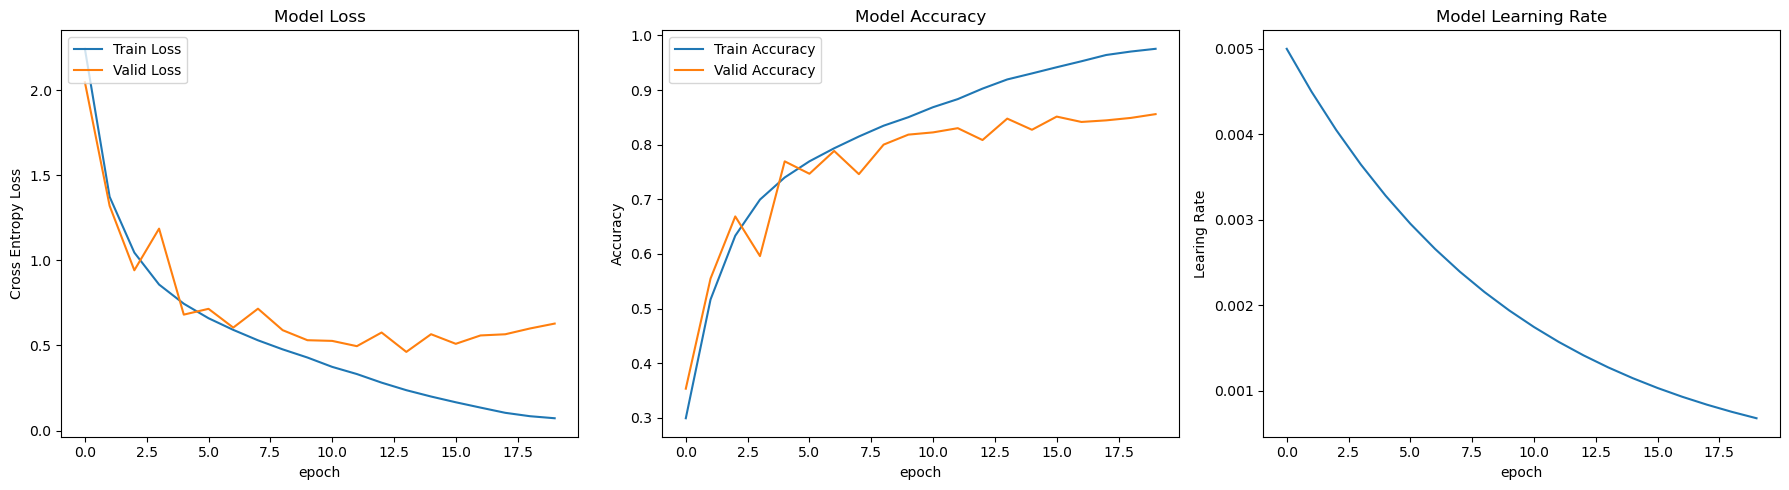

In [44]:
show_process(train_lossesR3, valid_lossesR3, train_accsR3, valid_accsR3, lrsR3)

# Training On the All Datasets and Testing On the Testing Dataset

In [57]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on %s" %device)

model = ResNet(kernel_size=3).to(device)
model.device = device
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5, lr=5e-3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.90, last_epoch=-1)

n_epochs = 20
batch_size = 128
train_loader = Data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

train_losses = []
train_accs = []

for epoch in range(1, n_epochs + 1):
    model.train()
    n_correct = 0
    n_total = 0
    train_loss = []
    for batch in tqdm(train_loader):
        x, true_label = batch
        preds = model(x.to(device))
        loss = criterion(preds, true_label.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

        _, pred_label = torch.max(preds, 1)
        n_correct += (pred_label == true_label.to(device)).sum().item()
        n_total += true_label.shape[0]
    scheduler.step()
        
    train_acc = n_correct / n_total
    avg_train_loss = sum(train_loss) / len(train_loss)

    train_losses.append(avg_train_loss)
    train_accs.append(train_acc)

    print("epoch [%d], train loss: [%.4f], train accuracy: [%.4f]" 
          %(epoch, avg_train_loss, train_acc))

Running on cuda


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [1], train loss: [2.0567], train accuracy: [0.3625]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [2], train loss: [1.1913], train accuracy: [0.5888]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [3], train loss: [0.8393], train accuracy: [0.7077]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [4], train loss: [0.6715], train accuracy: [0.7680]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [5], train loss: [0.5571], train accuracy: [0.8096]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [6], train loss: [0.4707], train accuracy: [0.8387]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [7], train loss: [0.3940], train accuracy: [0.8652]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [8], train loss: [0.3302], train accuracy: [0.8867]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [9], train loss: [0.2709], train accuracy: [0.9060]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [10], train loss: [0.2157], train accuracy: [0.9247]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [11], train loss: [0.1682], train accuracy: [0.9418]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [12], train loss: [0.1263], train accuracy: [0.9556]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [13], train loss: [0.0998], train accuracy: [0.9649]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [14], train loss: [0.0725], train accuracy: [0.9753]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [15], train loss: [0.0547], train accuracy: [0.9813]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [16], train loss: [0.0445], train accuracy: [0.9851]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [17], train loss: [0.0340], train accuracy: [0.9883]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [18], train loss: [0.0283], train accuracy: [0.9911]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [19], train loss: [0.0203], train accuracy: [0.9932]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [20], train loss: [0.0156], train accuracy: [0.9950]


In [59]:
model.eval()
test_loader = Data.DataLoader(test_dataset, batch_size=128, shuffle=False)

n_correct = 0
n_total = 0
test_losses = []

true_labels = torch.Tensor()
pred_labels = torch.Tensor()

for batch in tqdm(test_loader):
    x, true_label = batch
    with torch.no_grad():
        preds = model(x.to(device))
        loss = criterion(preds, true_label.to(device))
        test_losses.append(loss.item())
    
    _, pred_label = torch.max(preds, 1)
    n_correct += (pred_label == true_label.to(device)).sum().item()
    n_total += true_label.shape[0]

    true_labels = torch.cat((true_labels, true_label.to("cpu")), 0)
    pred_labels = torch.cat((pred_labels, pred_label.to("cpu")), 0)


test_acc = n_correct / n_total
avg_test_loss = sum(test_losses) / len(test_losses)

print("test loss is: %.4f, test accuracy is: %.4f" %(avg_test_loss, test_acc))

  0%|          | 0/79 [00:00<?, ?it/s]

test loss is: 0.6233, test accuracy is: 0.8818


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on %s" %device)

model = CNN4(kernel_size=3).to(device)
model.device = device
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5, lr=5e-3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.90, last_epoch=-1)

n_epochs = 20
batch_size = 128
train_loader = Data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

train_losses = []
train_accs = []

for epoch in range(1, n_epochs + 1):
    model.train()
    n_correct = 0
    n_total = 0
    train_loss = []
    for batch in tqdm(train_loader):
        x, true_label = batch
        preds = model(x.to(device))
        loss = criterion(preds, true_label.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

        _, pred_label = torch.max(preds, 1)
        n_correct += (pred_label == true_label.to(device)).sum().item()
        n_total += true_label.shape[0]
    scheduler.step()
        
    train_acc = n_correct / n_total
    avg_train_loss = sum(train_loss) / len(train_loss)

    train_losses.append(avg_train_loss)
    train_accs.append(train_acc)

    print("epoch [%d], train loss: [%.4f], train accuracy: [%.4f]" 
          %(epoch, avg_train_loss, train_acc))

Running on cuda


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [1], train loss: [2.0806], train accuracy: [0.2595]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [2], train loss: [1.3362], train accuracy: [0.5151]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [3], train loss: [1.0369], train accuracy: [0.6344]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [4], train loss: [0.8474], train accuracy: [0.7089]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [5], train loss: [0.7040], train accuracy: [0.7607]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [6], train loss: [0.5978], train accuracy: [0.7976]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [7], train loss: [0.5147], train accuracy: [0.8262]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [8], train loss: [0.4490], train accuracy: [0.8496]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [9], train loss: [0.3820], train accuracy: [0.8706]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [10], train loss: [0.3255], train accuracy: [0.8896]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [11], train loss: [0.2715], train accuracy: [0.9078]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [12], train loss: [0.2271], train accuracy: [0.9238]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [13], train loss: [0.1837], train accuracy: [0.9364]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [14], train loss: [0.1457], train accuracy: [0.9497]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [15], train loss: [0.1148], train accuracy: [0.9605]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [16], train loss: [0.0883], train accuracy: [0.9697]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [17], train loss: [0.0709], train accuracy: [0.9754]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [18], train loss: [0.0565], train accuracy: [0.9806]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [19], train loss: [0.0429], train accuracy: [0.9850]


  0%|          | 0/391 [00:00<?, ?it/s]

epoch [20], train loss: [0.0357], train accuracy: [0.9879]


In [5]:
model.eval()
test_loader = Data.DataLoader(test_dataset, batch_size=128, shuffle=False)

n_correct = 0
n_total = 0
test_losses = []

true_labels = torch.Tensor()
pred_labels = torch.Tensor()

for batch in tqdm(test_loader):
    x, true_label = batch
    with torch.no_grad():
        preds = model(x.to(device))
        loss = criterion(preds, true_label.to(device))
        test_losses.append(loss.item())
    
    _, pred_label = torch.max(preds, 1)
    n_correct += (pred_label == true_label.to(device)).sum().item()
    n_total += true_label.shape[0]

    true_labels = torch.cat((true_labels, true_label.to("cpu")), 0)
    pred_labels = torch.cat((pred_labels, pred_label.to("cpu")), 0)


test_acc = n_correct / n_total
avg_test_loss = sum(test_losses) / len(test_losses)

print("test loss is: %.4f, test accuracy is: %.4f" %(avg_test_loss, test_acc))

  0%|          | 0/79 [00:00<?, ?it/s]

test loss is: 1.0339, test accuracy is: 0.8388


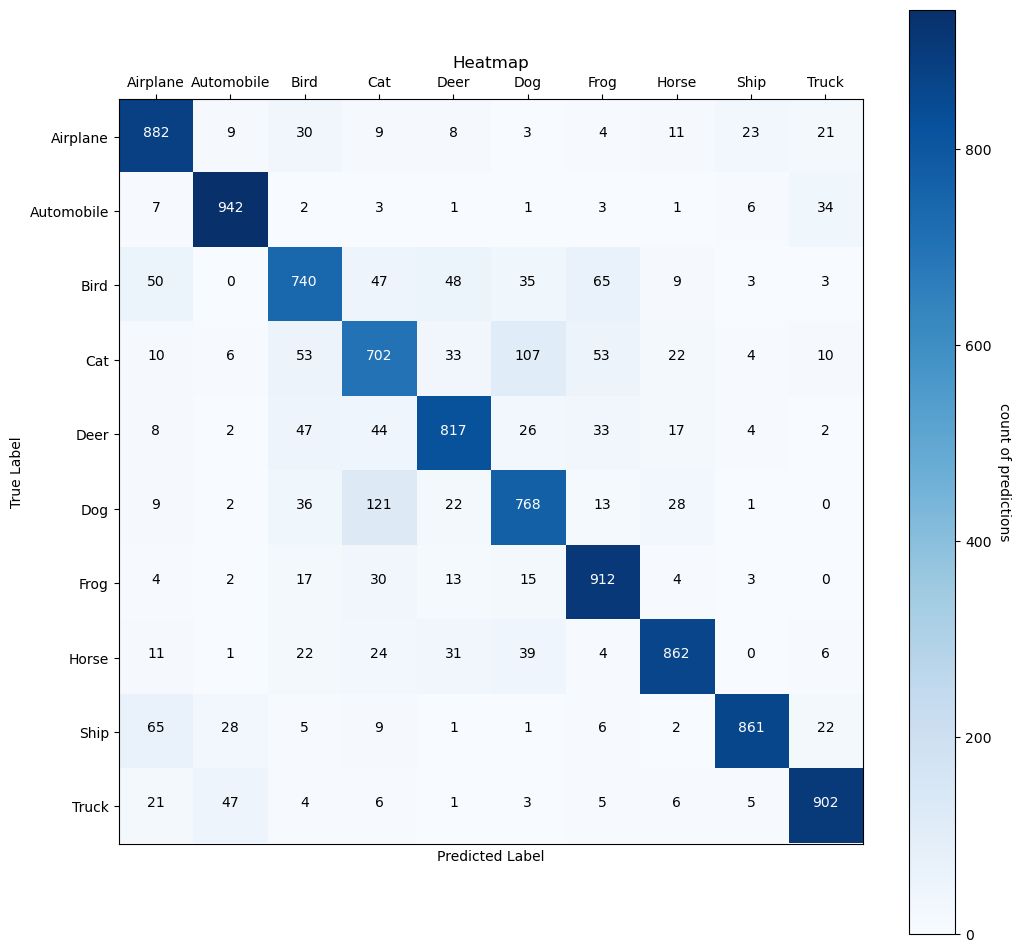

In [6]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
cm = confusion_matrix(true_labels.to("cpu"), pred_labels.to("cpu"))
heatmap(cm, labels, cbarlabel="count of predictions")

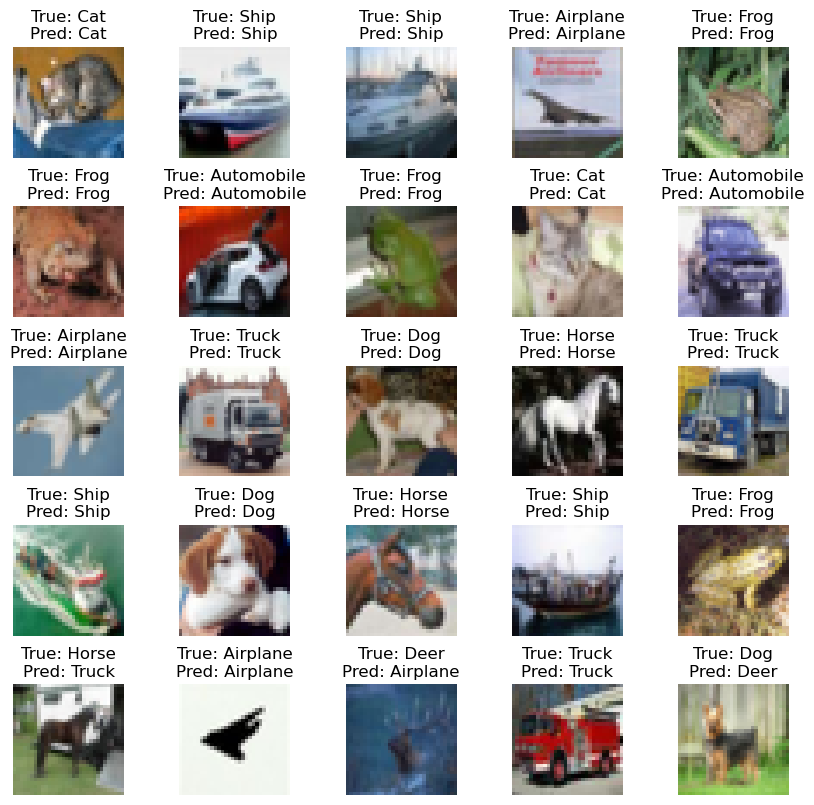

In [7]:
row = 5
column = 5
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes = plt.subplots(row, column, figsize=(10, 10))
axes = axes.ravel()

for i in range(row * column):
    img, label = test_dataset[i]
    axes[i].imshow(img.permute(1,2,0))
    axes[i].set_title("True: %s\nPred: %s" %(labels[label], labels[int(pred_labels[i])]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)